<a href="https://colab.research.google.com/github/minshyee/BankChurnersPredictProject/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_%EC%B6%94%EA%B0%80_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/BankChurners.csv')

In [3]:
df['Customer_Age'] = df['Customer_Age'].apply(lambda x : int(x/10) * 10)
df['Months_on_book'] = df['Months_on_book'].apply(lambda x: int(x/12))
df.rename(columns = {"Months_on_book": "Years_on_book"}, inplace = True)
# Exist = 0, Attrited = 1
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 0 if x == 'Existing Customer' else 1)
drop_columns = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.drop(drop_columns,axis=1,inplace=True)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

In [4]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Years_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,40,0,3,High School,Married,$60K - $80K,Blue,3,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,40,1,5,Graduate,Single,Less than $40K,Blue,3,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,50,0,3,Graduate,Married,$80K - $120K,Blue,3,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,High School,Unknown,Less than $40K,Blue,2,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,1,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,Graduate,Single,$40K - $60K,Blue,3,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,40,0,2,Unknown,Divorced,$40K - $60K,Blue,2,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,40,1,1,High School,Married,Less than $40K,Blue,3,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,Graduate,Unknown,$40K - $60K,Blue,3,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [54]:
# 소득수준에 따른 카드 등급차이
from scipy.stats import chi2_contingency
obs2 = pd.crosstab(df['Income_Category'], df['Card_Category'])
print('P-value :',chi2_contingency(obs2, correction = False)[1]) 
print('P-value :',chi2_contingency(obs2, correction = True)[1])
# 유의수준이 0.05일때 둘은 연관이 있음을 알 수 있다.


P-value : 1.2106873689789959e-14
P-value : 1.2106873689789959e-14


In [84]:
obs2

Card_Category,Blue,Gold,Platinum,Silver
Income_Category,,,,
$120K +,645,18,4,60
$40K - $60K,1675,15,1,99
$60K - $80K,1273,29,4,96
$80K - $120K,1395,21,2,117
Less than $40K,3403,24,4,130
Unknown,1045,9,5,53


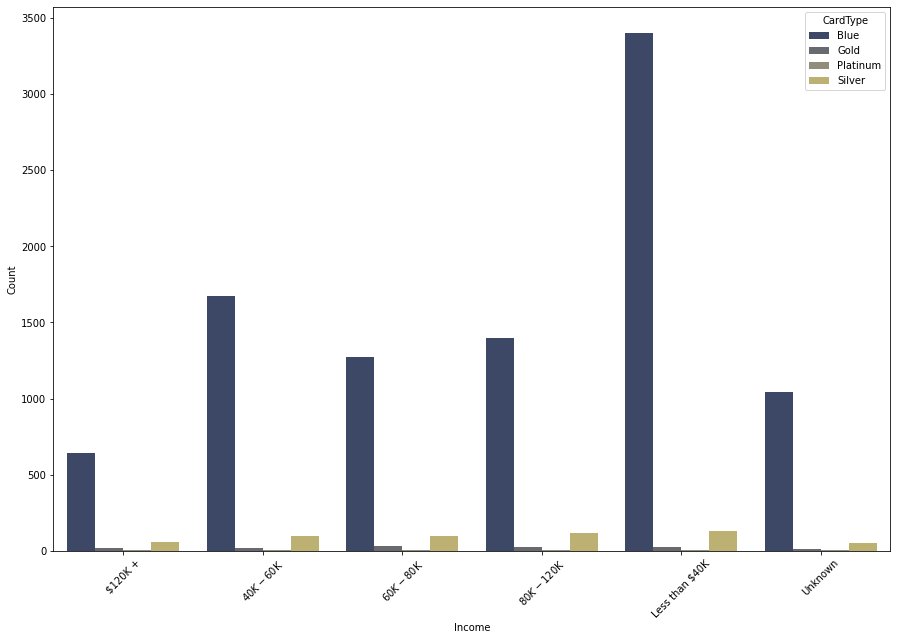

In [74]:
# 소득수준이 높을수록 높은 등급의 카드를 사용한다
d =df.groupby(['Income_Category','Card_Category'])['Gender'].count().reset_index()
d.columns = ['Income','CardType','Count']
plt.figure(figsize=(15,10))
plt.xticks(rotation =45)
sns.barplot(x='Income', y='Count', hue='CardType',data=d,palette='cividis')

In [8]:
# 장기고객의 이탈률(2년 이상은 장기 고객이라고 판단)

print('2년 이상 거래했으나 떠난 사람들',round(len(df.loc[(df.Years_on_book >= 2) & (df.Attrition_Flag == 1)])/len(df.loc[df.Years_on_book >= 2])*100,2),'%')
print('2년 미만 거래했으나 떠난 사람들',round(len(df.loc[(df.Years_on_book < 2) & (df.Attrition_Flag == 1)])/len(df.loc[df.Years_on_book< 2])*100,2),'%')

2년 이상 거래했으나 떠난 사람들 16.2 %
2년 미만 거래했으나 떠난 사람들 14.26 %


In [99]:
long = round(len(df.loc[(df.Years_on_book >= 2) & (df.Attrition_Flag == 1)])/len(df.loc[df.Years_on_book >= 2])*100,2)
short = round(len(df.loc[(df.Years_on_book < 2) & (df.Attrition_Flag == 1)])/len(df.loc[df.Years_on_book< 2])*100,2)

a = [long,short]
a = pd.DataFrame(a)
a.index = ['long', 'short']
a.columns = ['percent']
a

,percent
long,16.20
short,14.26


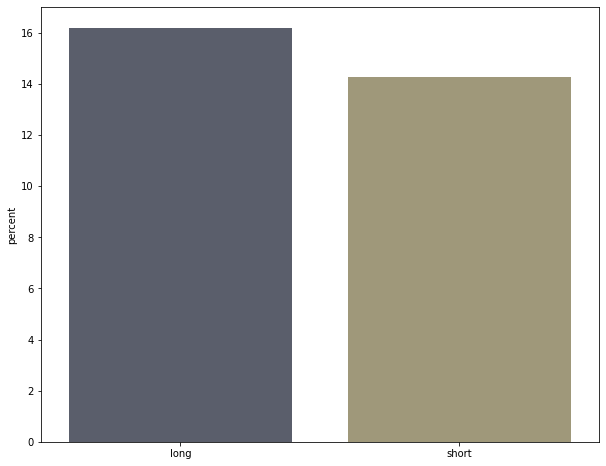

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(x=a.index, y='percent', data=a, palette='cividis')

In [52]:

obs2 = pd.crosstab(df['Attrition_Flag'], df['Years_on_book'])
print('P-value :',chi2_contingency(obs2, correction = False)[1]) 
print('P-value :',chi2_contingency(obs2, correction = True)[1])
# 유의수준이 0.05일때 둘은 연관이 없음을 알수 있다.

P-value : 0.0990887277580675
P-value : 0.0990887277580675


In [38]:
c = pd.DataFrame(df[['Total_Revolving_Bal','Attrition_Flag']].value_counts()).reset_index()
c.columns = ['balance', 'Flag','count']
c.sort_values('balance',ascending=False, inplace=True)
c = c.reset_index(drop=True)
c

,balance,Flag,count
0,2517,0,350
1,2517,1,158
2,2514,0,2
3,2514,1,1
4,2513,1,1
...,...,...,...
2350,145,1,1
2351,134,1,1
2352,132,1,1
2353,0,1,893


In [41]:
c.balance.describe()

count    2355.000000
mean     1445.842038
std       599.268221
min         0.000000
25%       948.500000
50%      1449.000000
75%      1945.500000
max      2517.000000
Name: balance, dtype: float64

In [46]:
print('1449 이상의 잔액이 남았으나 떠난 사람들',round(len(c.loc[(c.balance > 1449) & (df.Attrition_Flag == 1)])/len(c.loc[c.balance > 1449] )*100,2),'%')
print('1449 이상의 잔액이 남아서 유지하는 사람들',round(len(c.loc[(c.balance > 1449) & (df.Attrition_Flag == 0)])/len(c.loc[c.balance > 1449] )*100,2),'%')
print('1449 미만의 잔액이 남았으나 떠난 사람들',round(len(c.loc[(c.balance < 1449) & (df.Attrition_Flag == 1)])/len(c.loc[c.balance < 1449] )*100,2),'%')
print('1449 미만의 잔액이 남았으나 유지하는 사람들',round(len(c.loc[(c.balance < 1449) & (df.Attrition_Flag == 0)])/len(c.loc[c.balance < 1449] )*100,2),'%')



1449 이상의 잔액이 남았으나 떠난 사람들 9.95 %
1449 이상의 잔액이 남아서 유지하는 사람들 90.05 %
1449 미만의 잔액이 남았으나 떠난 사람들 6.63 %
1449 미만의 잔액이 남았으나 유지하는 사람들 93.37 %


In [53]:
obs3 = pd.crosstab(df['Attrition_Flag'], df['Total_Revolving_Bal'])
print('P-value :',chi2_contingency(obs3, correction = False)[1]) 
print('P-value :',chi2_contingency(obs3, correction = True)[1])
# 유의수준이 0.05일때 둘은 연관이 있음을 알수 있다.

P-value : 1.6849027275135004e-38
P-value : 1.6849027275135004e-38


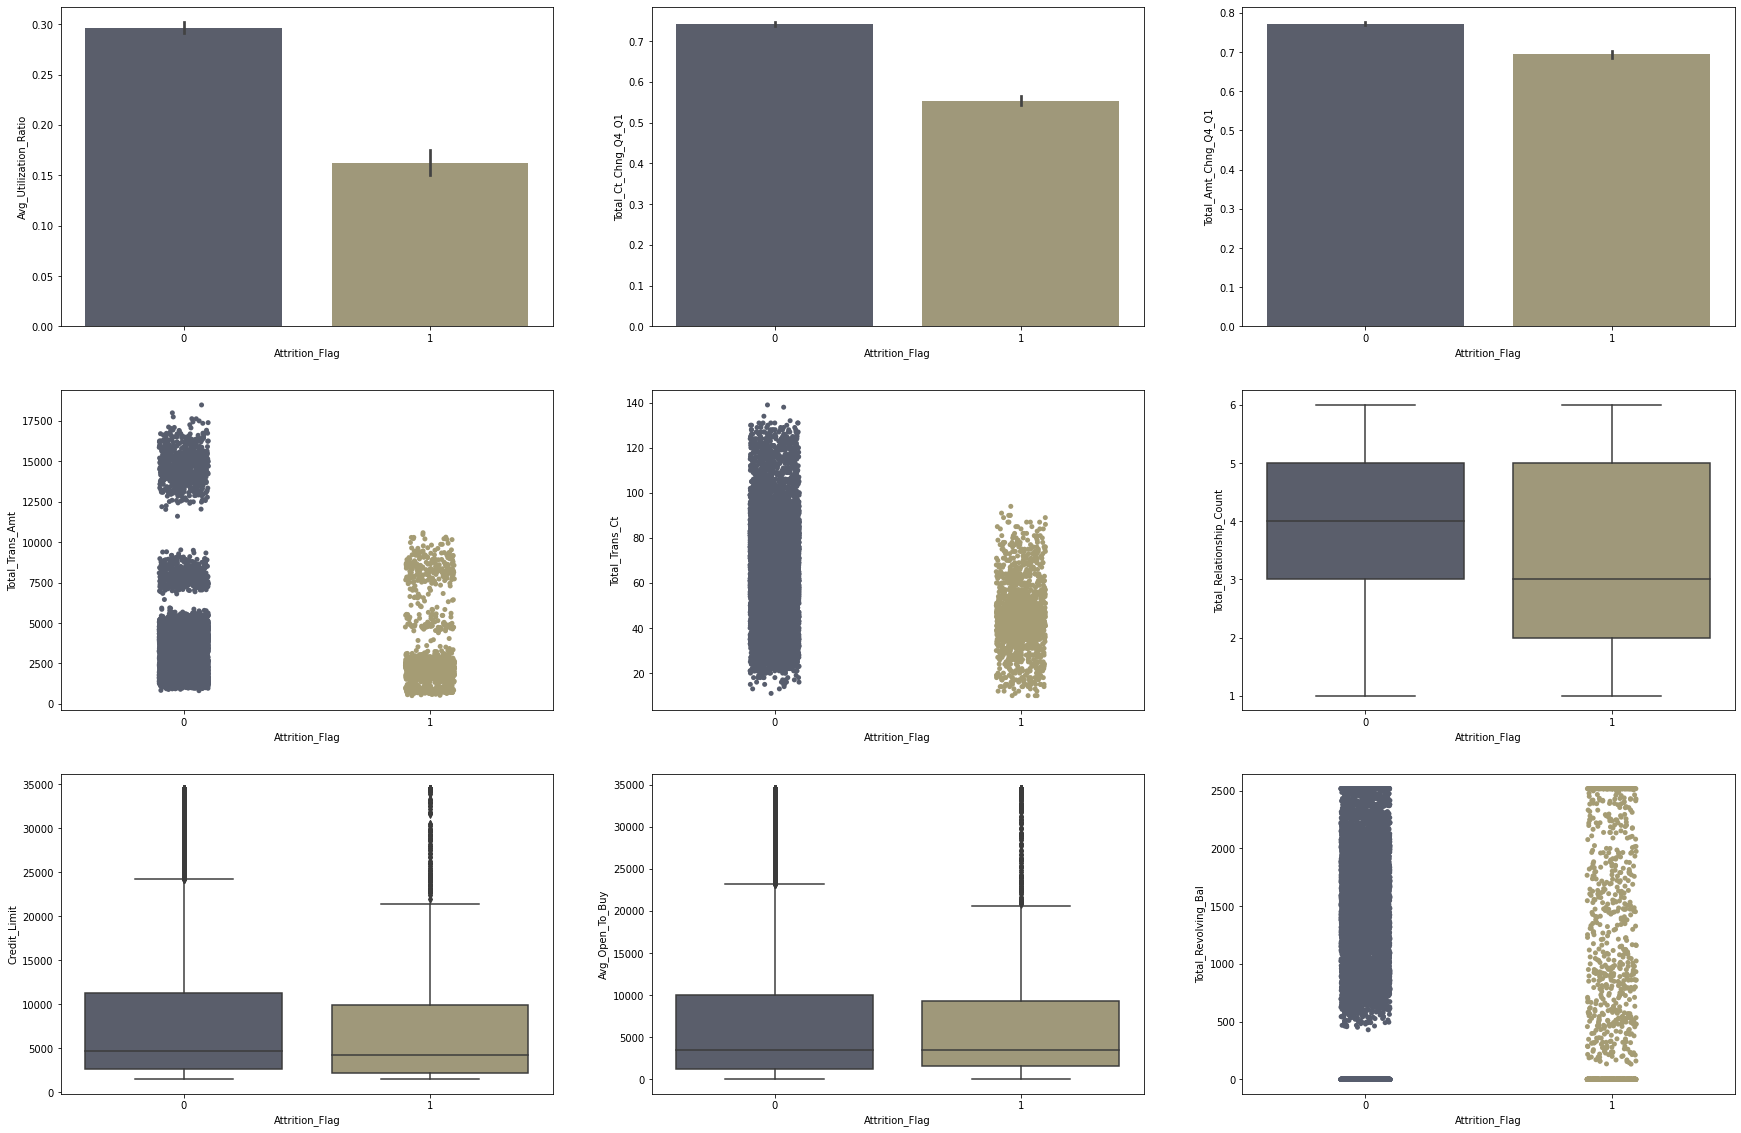

In [78]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,20))

# 현재 고객과 이탈 고객 간 이용률 차이
sns.barplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df,ax=axes[0,0],palette='cividis')

#현재 고객과 이탈 고객 간 새해 거래량 변화
sns.barplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df,ax=axes[0,1],palette='cividis')
sns.barplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=df,ax=axes[0,2],palette='cividis')

#현재 고객과 이탈 고객 간 총 거래량 차이
sns.stripplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df,ax=axes[1,0],palette='cividis')
sns.stripplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df,ax=axes[1,1],palette='cividis')

# 현재 고객과 이탈 고객의 상품 수 차이
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df,ax=axes[1,2],palette='cividis')

# 현재 고객과 이탈 고객 간 Open to Buy credit line
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df,ax=axes[2,0],palette='cividis')
sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=df,ax=axes[2,1],palette='cividis')
sns.stripplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df,ax=axes[2,2],palette='cividis')

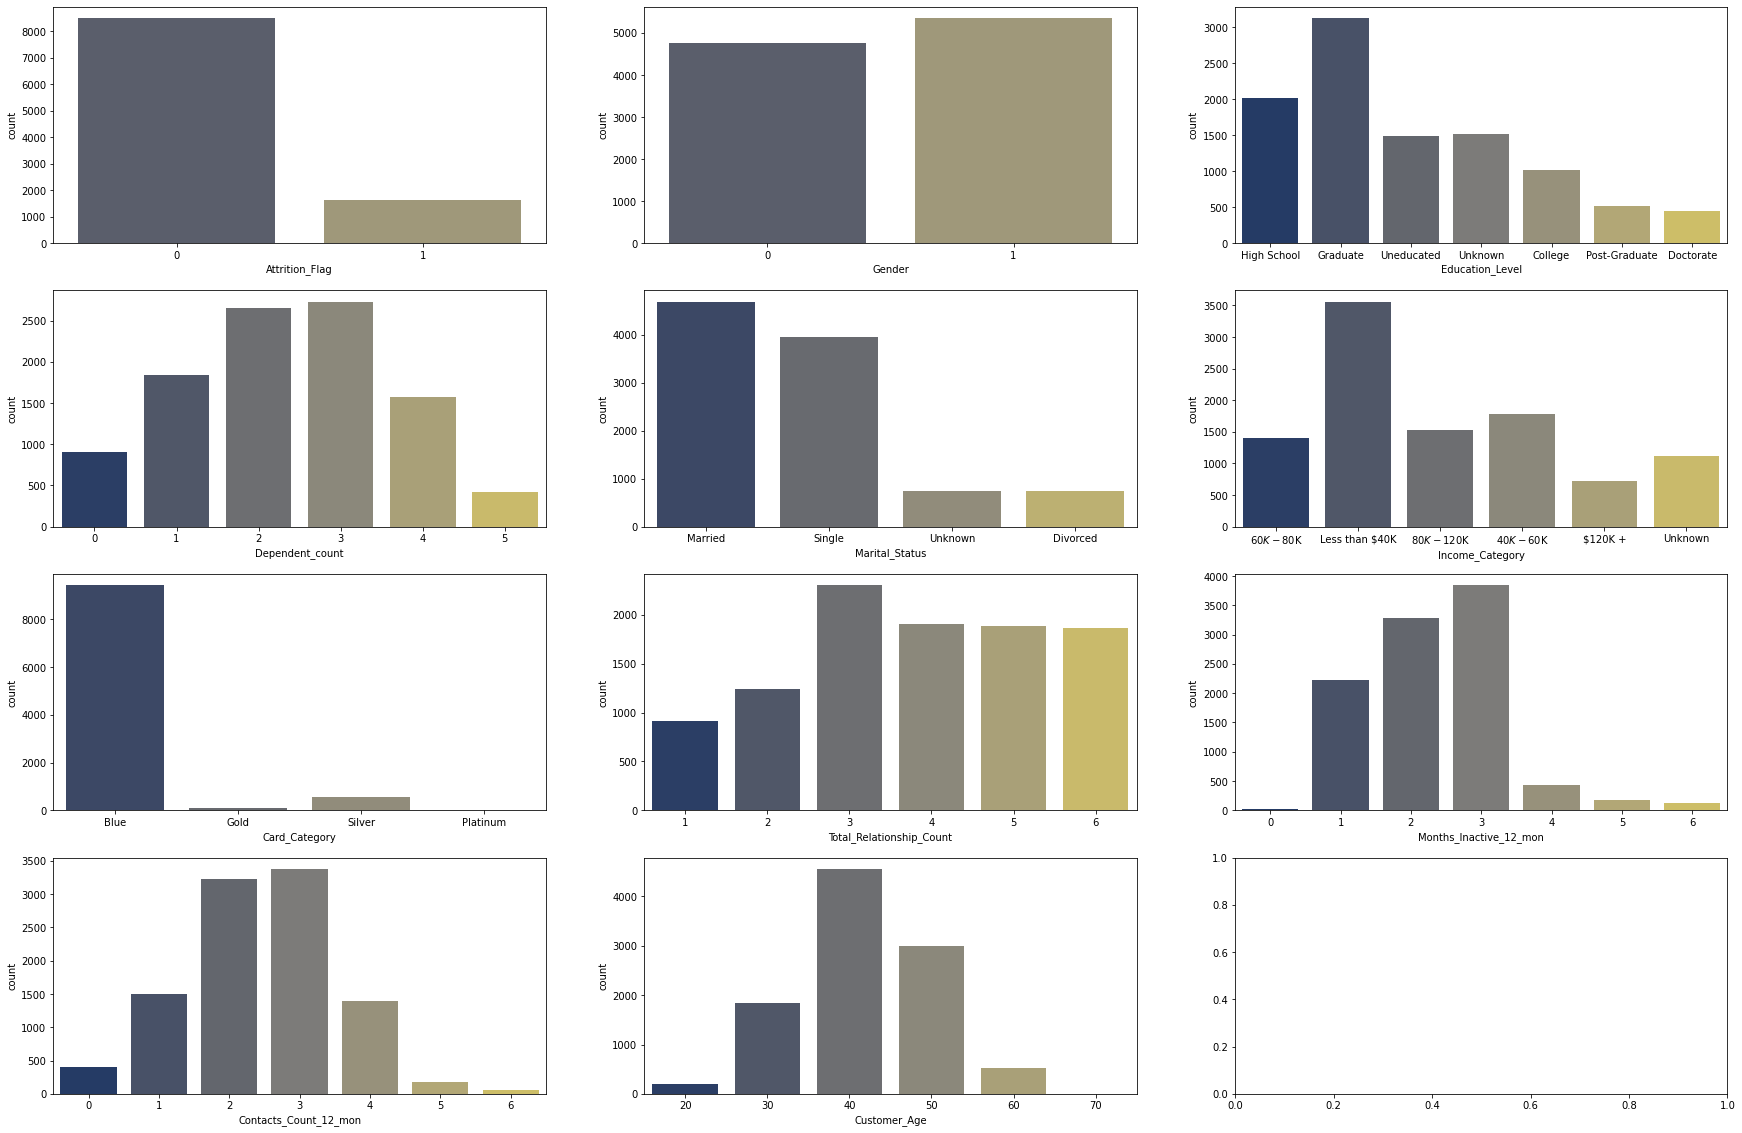

In [80]:

f, axes = plt.subplots(nrows=4, ncols=3, figsize=(30,20))

sns.countplot(x='Attrition_Flag',data=df, ax=axes[0,0],palette='cividis')
sns.countplot(x='Gender', data=df, ax=axes[0,1],palette='cividis')
sns.countplot(x='Education_Level', data=df, ax=axes[0,2],palette='cividis')
sns.countplot(x='Dependent_count', data=df, ax=axes[1,0],palette='cividis')
sns.countplot(x='Marital_Status', data=df, ax=axes[1,1],palette='cividis')
sns.countplot(x='Income_Category', data=df, ax=axes[1,2],palette='cividis')
sns.countplot(x='Card_Category', data=df, ax=axes[2,0],palette='cividis')
sns.countplot(x='Total_Relationship_Count', data=df, ax=axes[2,1],palette='cividis')
sns.countplot(x='Months_Inactive_12_mon', data=df, ax=axes[2,2],palette='cividis')
sns.countplot(x='Contacts_Count_12_mon', data=df, ax=axes[3,0],palette='cividis')
sns.countplot(x='Customer_Age', data=df, ax=axes[3,1],palette='cividis')
# sns.countplot(x='R_Ma_Status', data=df, ax=axes[3,2],palette='cividis')

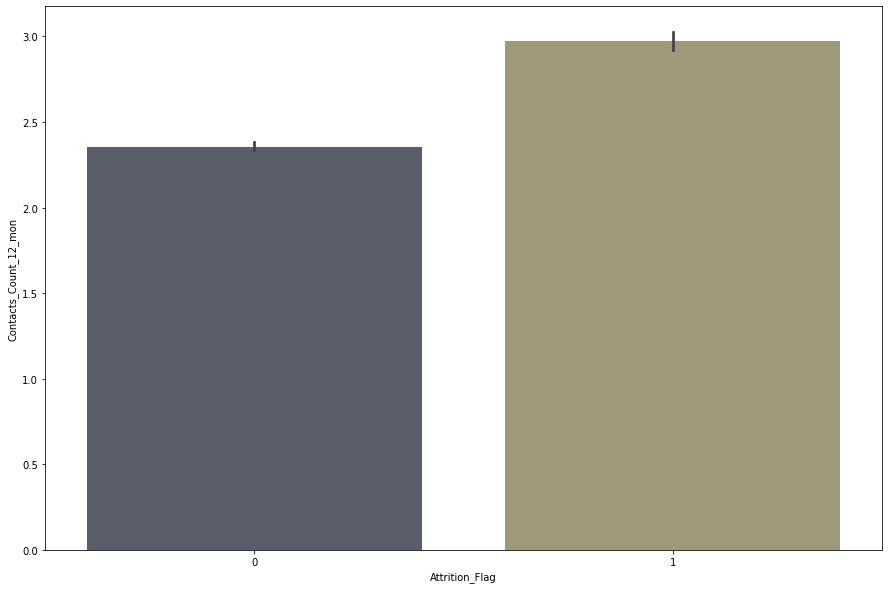

In [83]:
# 컨택 수에 따른 이탈율
plt.figure(figsize=(15,10))
sns.barplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df,palette='cividis')

In [ ]:
print('1449 미만의 잔액이 남았으나 떠난 사람들',round(len(c.loc[(c.balance < 1449) & (df.Attrition_Flag == 1)])/len(c.loc[c.balance < 1449] )*100,2),'%')
print('1449 미만의 잔액이 남았으나 유지하는 사람들',round(len(c.loc[(c.balance < 1449) & (df.Attrition_Flag == 0)])/len(c.loc[c.balance < 1449] )*100,2),'%')